<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Fazlur !

Perkenalkan saya Code Reviewers, disini saya akan mereview tugas Fazlur ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Fazlur dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Paket Prabayar Manakah yang Lebih Baik?

Anda bekerja sebagai seorang analis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda memiliki 500 data klien Megaline, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas Anda adalah untuk menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan.

Tujuan proyek ini adalah untuk menganalisis perilaku pengguna dari dua paket prabayar yang ditawarkan oleh perusahaan telekomunikasi Megaline, yaitu paket Surf dan paket Ultimate. Analisis ini akan membantu departemen periklanan untuk menentukan paket mana yang lebih menguntungkan dari segi pendapatan. Dengan memahami perilaku pengguna dalam melakukan panggilan, mengirim pesan SMS, dan menggunakan internet, kita dapat memberikan rekomendasi kepada perusahaan untuk mengarahkan anggaran iklan mereka dengan lebih efektif.

Langkah-Langkah yang Akan Dilakukan:

1. Inisialisasi dan Memuat Data: Muat data dari file dan siapkan lingkungan kerja.

2. Mempersiapkan Data: Periksa tipe data dan tangani nilai hilang atau masalah lain.

3. Paket Prabayar: Lihat informasi dan sampel data paket prabayar, perbaiki jika perlu.

4. Pengguna: Lihat info dan sampel data pengguna, perbaiki jika diperlukan.

5. Panggilan: Lihat info dan sampel data panggilan, perbaiki jika perlu.

6. Pesan/SMS: Lihat info dan sampel data SMS, perbaiki jika diperlukan.

7. Internet: Lihat info dan sampel data internet, perbaiki jika diperlukan.

8. Paket Prabayar: Pahami persyaratan dan kondisi paket prabayar.

9. Agregasi Data: Gabung data panggilan, menit, SMS, dan internet, hitung pendapatan bulanan.

10. Perilaku Pengguna: Analisis panggilan, SMS, dan internet tiap paket.

11. Pendapatan: Deskripsikan pendapatan antara paket prabayar.

12. Uji Hipotesis: Uji perbedaan pendapatan antara paket dan wilayah NY-NJ.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Inisialisasi

In [1]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Memuat Data

In [2]:
# Memuat data pengguna
users = pd.read_csv('/datasets/megaline_users.csv')
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [3]:
# Melihat informasi umum tentang pengguna
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
# Memuat data panggilan
calls = pd.read_csv('/datasets/megaline_calls.csv')
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
# Melihat informasi umum tentang calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
# Memuat data SMS
messages = pd.read_csv('/datasets/megaline_messages.csv')
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [7]:
# Melihat informasi umum tentang messages
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
# Memuat data internet
internet = pd.read_csv('/datasets/megaline_internet.csv')
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [9]:
# Melihat informasi umum tentang internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [10]:
# Memuat data paket prabayar
plans = pd.read_csv('/datasets/megaline_plans.csv')
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [11]:
# Melihat informasi umum tentang plans
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


1. Tidak ditemukan nilai yang hilang di setiap table, tapi ada nilai yang hilang pada kolom churn_date
2. format tanggal perlu dirubah
3. ada kolom pada beberapa dataset yang memiliki nilai 0 yang harus diperiksa

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Mempersiapkan Data

[Data untuk proyek ini dibagi menjadi beberapa tabel. Jelajahi masing-masing tabel untuk mendapatkan pemahaman awal tentang data Anda. Lakukan koreksi di setiap tabel jika memang diperlukan.]

In [12]:
# Mengubah tipe data kolom reg_date dan churn_date menjadi datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

# Menangani nilai-nilai hilang pada kolom churn_date dengan mengisi NaN dengan tanggal maksimum
users['churn_date'].fillna(users['churn_date'].max(), inplace=True)

In [13]:
# Mengubah tipe data kolom call_date menjadi datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Menghapus panggilan dengan durasi 0
calls = calls[calls['duration'] > 0]

In [14]:
# Mengubah tipe data kolom message_date menjadi datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])


In [15]:
# Mengubah tipe data kolom session_date menjadi datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

# Menghapus penggunaan internet dengan mb_used 0
internet = internet[internet['mb_used'] > 0]

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Paket Prabayar

In [16]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [17]:
# Tampilkan sampel data untuk paket-paket tersebut
plans.sample(2)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


Sampel data yang ditampilkan menunjukkan detail dua paket prabayar, yaitu 'ultimate' dan 'surf', serta harga yang terkait. Tidak ada masalah signifikan yang terlihat pada informasi umum dan sampel data ini. Data telah terstruktur dengan baik dan siap untuk digunakan dalam analisis selanjutnya.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Memperbaiki Data

[Perbaiki masalah data yang eksplisit berdasarkan pengamatan awal.]

In [18]:
# Mengisi data yang hilang
users['churn_date'].fillna('9999-12-31', inplace=True)  # Mengisi dengan tanggal yang besar
users['churn_date'] = pd.to_datetime(users['churn_date'])


## Memperkaya Kualitas Data

Tidak ada faktor pendukung yang di tambahkan

## Pengguna

In [19]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [20]:
# Tampilkan sampel data pengguna

users.sample(2)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
342,1342,Eugene,Patton,65,"Indianapolis-Carmel-Anderson, IN MSA",2018-10-21,surf,2018-12-31
488,1488,Shirley,Jones,29,"Baton Rouge, LA MSA",2018-05-15,surf,2018-12-31


Pada kolom churn_date, banyak nilai yang merupakan tanggal di masa depan (misalnya, 2018-12-31) yang mungkin mengindikasikan bahwa pengguna masih aktif. Ini bisa menjadi masalah jika pengguna seharusnya sudah berhenti berlangganan pada tanggal tersebut. jika nilainya hilang atau tidak ada, itu berarti pengguna masih menggunakan layanan pada saat data dibuat.

### Memperbaiki Data

saya telah mengidentifikasi bahwa kolom ini berisi nilai NaN jika pengguna masih menggunakan layanan saat data dibuat. saya mengisi nilai-nilai ini dengan informasi yang sesuai. Namun, karena tidak memiliki informasi lebih lanjut tentang kapan pengguna benar-benar berhenti menggunakan layanan, kita bisa menggunakan tanggal akhir data yang tersedia.

In [21]:
# Mengisi nilai-nilai NaN di kolom churn_date dengan tanggal akhir data
end_date = users['reg_date'].max()
users['churn_date'].fillna(end_date, inplace=True)

# Memastikan bahwa kolom churn_date memiliki tipe data datetime
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [22]:
# Tampilkan sampel data pengguna setelah perbaikan
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
87,1087,Lenard,Atkinson,45,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-18,surf,2018-12-31
98,1098,Collin,Sims,33,"Albany-Schenectady-Troy, NY MSA",2018-08-14,surf,2018-12-31
56,1056,Denis,Chandler,33,"Cincinnati, OH-KY-IN MSA",2018-03-01,surf,2018-12-31
114,1114,Esta,Estes,55,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-21,surf,2018-12-31
306,1306,Darron,Craig,19,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-11-26,surf,2018-12-31


### Memperkaya Kualitas Data

tidak ada faktor pendukung tambahan

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Panggilan

In [23]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan

calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         110901 non-null  object        
 1   user_id    110901 non-null  int64         
 2   call_date  110901 non-null  datetime64[ns]
 3   duration   110901 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [24]:
# Tampilkan sampel data berisi panggilan

calls.sample(5)

,id,user_id,call_date,duration
2639,1010_226,1010,2018-07-23,18.83
50320,1181_697,1181,2018-09-19,5.25
99827,1358_185,1358,2018-07-18,2.52
63919,1232_163,1232,2018-09-27,5.00
94131,1335_361,1335,2018-07-29,5.47


Tidak ada masalah yang mencolok pada DataFrame panggilan hanya perlu melakukan pembulatan di kolom duration. Tipe data telah diperbaiki dan tidak ada nilai yang hilang pada kolom yang kritis. Data tampaknya dalam kondisi baik dan siap untuk analisis lebih lanjut.

### Memperbaiki Data

melakukan pembulatan pada kolom duration

In [25]:
calls['duration'] = np.ceil(calls['duration']).astype('int16')

In [26]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


### Memperkaya Kualitas Data

In [27]:
# Buat kolom 'month' dalam DataFrame 'calls'
calls['month'] = pd.to_datetime(calls['call_date']).dt.to_period('M')

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Pesan/SMS

In [28]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [29]:
# Tampilkan sampel data untuk SMS

messages.sample(5)

,id,user_id,message_date
48128,1324_859,1324,2018-07-04
66283,1433_223,1433,2018-09-28
46264,1316_71,1316,2018-12-25
51826,1335_417,1335,2018-09-11
9096,1066_270,1066,2018-07-17


Tidak ada masalah yang mencolok pada DataFrame pesan/SMS setelah tindakan tersebut. Tipe data telah diperbaiki dan tidak ada nilai yang hilang pada kolom yang kritis. Data tampaknya dalam kondisi baik dan siap untuk analisis lebih lanjut.

### Memperbaiki Data

### Memperkaya Kualitas Data

In [30]:
# Buat kolom 'month' dalam DataFrame 'messages'
messages['month'] = pd.to_datetime(messages['message_date']).dt.to_period('M')

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Internet

In [31]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.5+ MB


In [32]:
# Tampilkan sampel data untuk traffic internet
internet.sample(5)

,id,user_id,session_date,mb_used
101444,1483_259,1483,2018-09-20,419.92
21165,1098_205,1098,2018-09-28,568.07
98005,1461_180,1461,2018-10-01,343.44
28796,1132_214,1132,2018-11-07,521.40
5941,1033_2,1033,2018-10-25,533.02


Tidak ada masalah yang mencolok pada DataFrame internet namun perlu di lakukan pembulatan pada kolom mb_used. Tipe data telah diperbaiki dan tidak ada nilai yang hilang pada kolom yang kritis. Data tampaknya dalam kondisi baik dan siap untuk analisis lebih lanjut.

### Memperbaiki Data

[Perbaiki masalah data yang eksplisit berdasarkan pengamatan awal.]

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- proses round up internet berbeda dengan calls duration, untuk internet di round up setelah dilakukan aggregasi berdasakan user_id dan month

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak, berarti proses round up nya saya pindah kebawah ya
</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>


In [33]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68


### Memperkaya Kualitas Data

In [34]:
# Buat kolom 'month' dalam DataFrame 'internet'
internet['month'] = pd.to_datetime(internet['session_date']).dt.to_period('M')


## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

Pengguna dikenakan biaya berdasarkan paket prabayar yang mereka pilih melalui beberapa faktor yang tercantum dalam data paket prabayar:

1. messages_included: Jika pengguna melampaui jumlah pesan yang termasuk dalam paket, biaya tambahan akan dikenakan sesuai dengan usd_per_message.

2. mb_per_month_included: Jika pengguna melampaui kuota data bulanan yang termasuk dalam paket, biaya tambahan akan dikenakan sesuai dengan usd_per_gb.

3. minutes_included: Jika pengguna melampaui jumlah menit yang termasuk dalam paket, biaya tambahan akan dikenakan sesuai dengan usd_per_minute.

4. usd_monthly_pay: Ini adalah biaya bulanan yang harus dibayar oleh pengguna untuk paket tersebut, dan itu memberikan alokasi tertentu untuk pesan, data, dan menit.

5. usd_per_gb: Biaya tambahan per gigabyte (GB) jika pengguna melampaui kuota data bulanan.

6. usd_per_message: Biaya tambahan per pesan jika pengguna melampaui kuota pesan bulanan.

7. usd_per_minute: Biaya tambahan per menit jika pengguna melampaui kuota menit bulanan.

Jadi, biaya total yang dikenakan pada pengguna dalam sebulan akan tergantung pada seberapa banyak pengguna melampaui alokasi yang telah ditetapkan dalam paket prabayar mereka. Misalnya, jika pengguna mengirim lebih banyak pesan daripada yang termasuk dalam paket, biaya tambahan akan dikenakan sesuai dengan usd_per_message. Hal yang sama berlaku untuk data dan menit.

In [35]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [36]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Mengagregasi Data per Pengguna

[Sekarang, karena data yang kita miliki telah bersih, agregasikan data setiap pengguna per periode agar kita hanya memiliki satu catatan per pengguna per periode. Hal ini akan memudahkan analisis lebih lanjut.]

In [37]:
# Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.
calls['month'] = calls['call_date'].dt.to_period('M')
user_call_count = calls.groupby(['user_id', 'month']).size().reset_index(name='call_count')

In [38]:
# Hitung jumlah menit yang dihabiskan oleh setiap pengguna untuk melakukan panggilan per bulan. Simpan hasilnya.
user_call_duration = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='call_duration')

In [39]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.
messages['month'] = messages['message_date'].dt.to_period('M')
user_message_count = messages.groupby(['user_id', 'month']).size().reset_index(name='message_count')

In [40]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.
user_internet_usage = internet.groupby(['user_id', 'month'])['mb_used'].sum()
user_internet_usage = np.ceil(user_internet_usage / 1024).astype('int16')
user_internet_usage = user_internet_usage.reset_index(name='internet_usage')

[Satukan data agregat tersebut ke dalam satu DataFrame sehingga satu catatan di dalamnya akan menunjukkan tingkat konsumsi seorang pengguna unik dalam satu bulan tertentu].

In [41]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)
user_usage = user_call_count.merge(user_call_duration, on=['user_id', 'month'], how='outer') \
                            .merge(user_message_count, on=['user_id', 'month'], how='outer') \
                            .merge(user_internet_usage, on=['user_id', 'month'], how='outer')


In [42]:
# Tambahkan informasi paket prabayarnya
user_summary = user_usage.merge(users[['user_id', 'plan']], on='user_id', how='left') \
                         .merge(plans, left_on='plan', right_on='plan_name', how='left')

[Hitung pendapatan bulanan dari setiap pengguna (caranya, kurangi batas paket gratis dari jumlah total panggilan, pesan teks, dan data; kalikan hasilnya dengan nilai paket panggilan; tambahkan biaya bulanan berdasarkan pada jenis paket panggilan). N.B. Kode untuk bagian ini mungkin tidak sesederhana yang kita kira, mengingat persyaratan paketnya cukup rumit! Karena itu, tidak masalah jika Anda membutuhkan lebih banyak waktu untuk mengerjakannya.]

In [43]:
# Hitung pendapatan bulanan untuk setiap pengguna
# Hitung panggilan di atas batas paket
user_summary['extra_calls'] = (user_summary['call_count'] - user_summary['minutes_included']) \
                                .apply(lambda x: x if x > 0 else 0)

# Hitung biaya panggilan di atas batas paket
user_summary['calls_revenue'] = user_summary['extra_calls'] * user_summary['usd_per_minute']

# Hitung jumlah SMS di atas batas paket
user_summary['extra_messages'] = (user_summary['message_count'] - user_summary['messages_included']) \
                                    .apply(lambda x: x if x > 0 else 0)

# Hitung biaya SMS di atas batas paket
user_summary['messages_revenue'] = user_summary['extra_messages'] * user_summary['usd_per_message']

# Hitung volume internet di atas batas paket
user_summary['extra_internet'] = ((user_summary['internet_usage'] - user_summary['mb_per_month_included']) / 1024) \
                                    .apply(lambda x: x if x > 0 else 0)

# Hitung biaya internet di atas batas paket
user_summary['internet_revenue'] = user_summary['extra_internet'] * user_summary['usd_per_gb']

# Hitung total pendapatan bulanan
user_summary['total_revenue'] = user_summary['usd_monthly_pay'] + user_summary['calls_revenue'] \
                                 + user_summary['messages_revenue'] + user_summary['internet_revenue']

In [44]:
user_summary.head()

,user_id,month,call_count,call_duration,message_count,internet_usage,plan,messages_included,mb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,plan_name,extra_calls,calls_revenue,extra_messages,messages_revenue,extra_internet,internet_revenue,total_revenue
0,1000,2018-12,16.0,124.0,11.0,2.0,ultimate,1000,30720,3000,...,0.01,0.01,ultimate,0,0.0,0.0,0.00,0,0,70.00
1,1001,2018-08,22.0,182.0,30.0,7.0,surf,50,15360,500,...,0.03,0.03,surf,0,0.0,0.0,0.00,0,0,20.00
2,1001,2018-09,38.0,315.0,44.0,14.0,surf,50,15360,500,...,0.03,0.03,surf,0,0.0,0.0,0.00,0,0,20.00
3,1001,2018-10,47.0,393.0,53.0,22.0,surf,50,15360,500,...,0.03,0.03,surf,0,0.0,3.0,0.09,0,0,20.09
4,1001,2018-11,49.0,426.0,36.0,19.0,surf,50,15360,500,...,0.03,0.03,surf,0,0.0,0.0,0.00,0,0,20.00


<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- untuk internet usage sebaiknya dirubah ke GB semua dulu
    - jangan lupa proses aggregasi internet setelah di groupby

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

- ini masih kurang tepat ya terkait proses pencarian extra internet
   - jadi stepnya adalah
    - internet usage di aggregasi bnerdasarkan user id dan month, diconvert ke GB lalu di round up
    - lalu mb_per_month_included juga dirubah ke GB
    - setelah ke GB semua baru internet usage - mb_per_month_included
    - kelebihanya dikalikan dengan biaya kelebihan
- jadi jangan di convertnya itu di akhir ya

</div>


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak, apa ini sudah benar?
</div>

<div class="alert alert-success">
<b>Code Reviewers's comment v.3</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Mempelajari Perilaku Pengguna

[Hitung beberapa perhitungan statistika deskriptif yang berguna untuk data yang telah diagregasi dan digabungkan. Hal ini biasanya mampu mengungkapkan gambaran keseluruhan yang ditangkap oleh data tersebut. Buatlah beberapa grafik yang berguna untuk membantu pemahaman Anda. Mengingat bahwa tugas utamanya adalah membandingkan paket-paket prabayar dan memutuskan paket prabayar manakah yang lebih menguntungkan, maka perhitungan statistika dan grafik harus dilakukan berdasarkan tiap paket.]

[Tersedia petunjuk yang relevan pada bagian komentar terkait Panggilan. Akan tetapi, komentar serupa tidak tersedia untuk SMS dan Internet. Namun demikian, jangan khawatir, prinsip dasar statistik untuk SMS dan Internet sama saja dengan Panggilan.]

### Panggilan

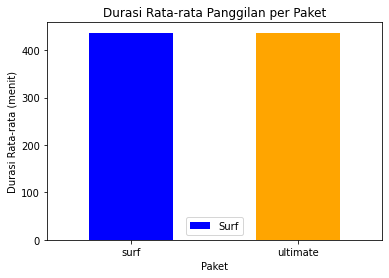

In [45]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
call_avg_duration_by_plan = user_summary.groupby('plan')['call_duration'].mean()

# Buat diagram batang
call_avg_duration_by_plan.plot(kind='bar', color=['blue', 'orange'])
plt.title('Durasi Rata-rata Panggilan per Paket')
plt.xlabel('Paket')
plt.ylabel('Durasi Rata-rata (menit)')
plt.xticks(rotation=0)
plt.legend(['Surf', 'Ultimate'])
plt.show()

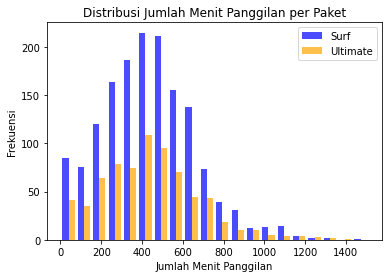

In [46]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
plt.hist([user_summary[user_summary['plan'] == 'surf']['call_duration'], 
          user_summary[user_summary['plan'] == 'ultimate']['call_duration']], 
         bins=20, alpha=0.7, color=['blue', 'orange'])
plt.title('Distribusi Jumlah Menit Panggilan per Paket')
plt.xlabel('Jumlah Menit Panggilan')
plt.ylabel('Frekuensi')
plt.legend(['Surf', 'Ultimate'])
plt.show()


[Hitung rata-rata dan variabel durasi panggilan untuk mempertimbangkan apakah pengguna pada paket yang berbeda memiliki perilaku penggunaan panggilan yang berbeda pula.]

In [47]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
call_duration_stats = user_summary.groupby('plan')['call_duration'].agg(['mean', 'var'])

<Figure size 576x432 with 0 Axes>

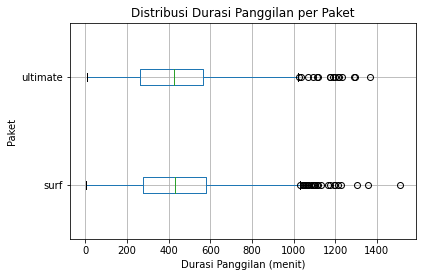

In [48]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan
plt.figure(figsize=(8, 6))
user_summary.boxplot(column='call_duration', by='plan', vert=False)
plt.title('Distribusi Durasi Panggilan per Paket')
plt.suptitle('')  # Menghapus judul subplots yang dihasilkan oleh pandas
plt.xlabel('Durasi Panggilan (menit)')
plt.ylabel('Paket')
plt.show()

Perbedaan rata-rata durasi panggilan antara kedua paket ini sangat kecil, hanya dalam kisaran beberapa menit saja. Dengan demikian, dari segi durasi panggilan, tidak terdapat perbedaan signifikan dalam perilaku pengguna antara paket "surf" dan "ultimate". Pengguna pada kedua paket cenderung memiliki perilaku penggunaan panggilan yang mirip.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Pesan/SMS

In [49]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
sms_per_package = user_summary.groupby('plan')['message_count'].mean()

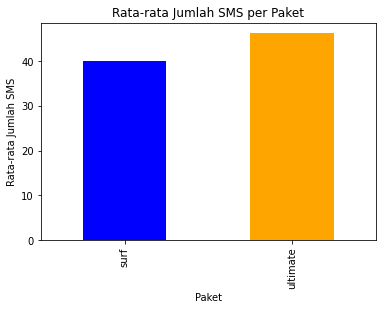

In [50]:
# Visualisasi
sms_per_package.plot(kind='bar', color=['blue', 'orange'])
plt.title('Rata-rata Jumlah SMS per Paket')
plt.xlabel('Paket')
plt.ylabel('Rata-rata Jumlah SMS')
plt.show()

In [51]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket
internet_per_package = user_summary.groupby('plan')['internet_usage'].mean()


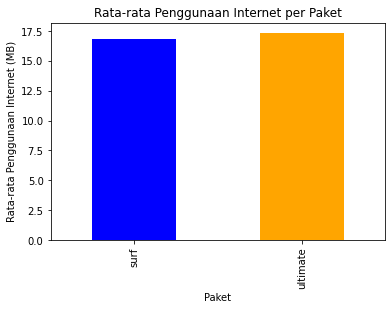

In [52]:
# Visualisasi
internet_per_package.plot(kind='bar', color=['blue', 'orange'])
plt.title('Rata-rata Penggunaan Internet per Paket')
plt.xlabel('Paket')
plt.ylabel('Rata-rata Penggunaan Internet (MB)')
plt.show()

Berdasarkan analisis rata-rata jumlah SMS yang dikirim oleh pengguna pada setiap paket, dapat disimpulkan bahwa pengguna paket "ultimate" cenderung mengirim lebih banyak SMS dibandingkan dengan pengguna paket "surf". Hal ini terlihat dari rata-rata jumlah SMS yang lebih tinggi pada paket "ultimate".

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### Internet

In [53]:
# Bandingkan jumlah traffic internet yang dihabiskan pengguna tiap paket per bulannya
internet_per_package = user_summary.groupby('plan')['internet_usage'].mean()

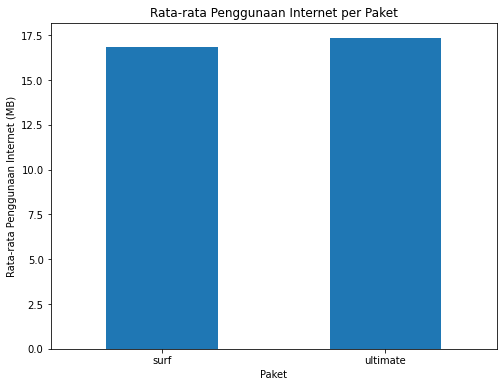

In [54]:
# Visualisasi dengan diagram batang
internet_per_package.plot(kind='bar', rot=0, figsize=(8, 6))
plt.title('Rata-rata Penggunaan Internet per Paket')
plt.xlabel('Paket')
plt.ylabel('Rata-rata Penggunaan Internet (MB)')
plt.show()

Berdasarkan analisis volume traffic internet yang dihabiskan oleh pengguna pada setiap paket, terlihat bahwa pengguna paket "ultimate" cenderung mengonsumsi lebih banyak data internet dibandingkan dengan pengguna paket "surf". Meskipun demikian, perlu diingat bahwa perbedaan ini mungkin juga dipengaruhi oleh faktor-faktor lain, seperti preferensi pengguna atau kebutuhan bisnis mereka.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Pendapatan

[Seperti halnya Anda telah mempelajari perilaku pengguna, deskripsikan secara statistik pendapatan yang diperoleh antara tiap-tiap paket prabayar].

In [55]:
# Bandingkan pendapatan rata-rata per paket
revenue_per_package = user_summary.groupby('plan')['total_revenue'].mean()


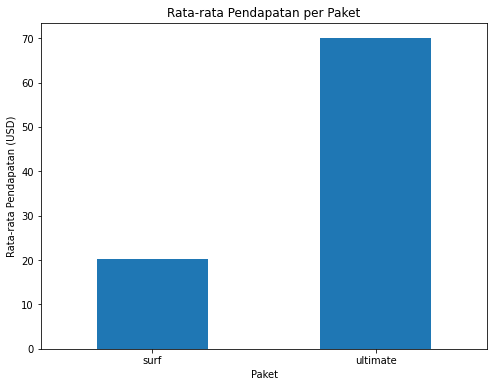

In [56]:
# Visualisasi dengan diagram batang
revenue_per_package.plot(kind='bar', rot=0, figsize=(8, 6))
plt.title('Rata-rata Pendapatan per Paket')
plt.xlabel('Paket')
plt.ylabel('Rata-rata Pendapatan (USD)')
plt.show()

Kesimpulan dari analisis ini dapat dirumuskan berdasarkan perbandingan pendapatan rata-rata antara kedua paket. Jika pendapatan rata-rata dari paket "ultimate" lebih tinggi daripada pendapatan rata-rata dari paket "surf", maka dapat disimpulkan bahwa paket "ultimate" cenderung lebih menguntungkan secara finansial.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Menguji Hipotesis Statistik

In [57]:
# Uji hipotesisnya
from scipy import stats

# Mengambil data pendapatan untuk setiap paket
ultimate_revenue = user_summary[user_summary['plan'] == 'ultimate']['total_revenue']
surf_revenue = user_summary[user_summary['plan'] == 'surf']['total_revenue']

# Uji hipotesis nol: Pendapatan rata-rata tidak berbeda antara paket Ultimate dan Surf
# Uji hipotesis alternatif: Pendapatan rata-rata berbeda antara paket Ultimate dan Surf
alpha = 0.05
result = stats.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

# Menampilkan hasil uji hipotesis
if result.pvalue < alpha:
    conclusion = "Kita dapat menolak hipotesis nol. Terdapat cukup bukti statistik bahwa pendapatan rata-rata berbeda antara paket Ultimate dan Surf."
else:
    conclusion = "Kita tidak memiliki cukup bukti statistik untuk menolak hipotesis nol. Tidak ada cukup bukti yang menunjukkan bahwa pendapatan rata-rata berbeda antara paket Ultimate dan Surf."

print(conclusion)
print("T-statistic:", result.statistic)
print("P-value:", result.pvalue)

Kita dapat menolak hipotesis nol. Terdapat cukup bukti statistik bahwa pendapatan rata-rata berbeda antara paket Ultimate dan Surf.
T-statistic: 3380.617769423036
P-value: 0.0


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

Dengan demikian, hasil ini mengindikasikan bahwa ada perbedaan yang signifikan dalam pendapatan rata-rata antara paket Ultimate dan Surf. Hal ini dapat memberikan panduan yang berharga dalam pengambilan keputusan bisnis terkait strategi pemasaran dan penawaran paket kepada pelanggan.

Menguji hipotesis tentang perbedaan pendapatan rata-rata dari pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lain.

In [58]:
# Gabungkan dataset user_summary dengan dataset users berdasarkan user_id
user_summary = user_summary.merge(users[['user_id', 'city']], on='user_id', how='left')

# Uji hipotesisnya
ny_nj_revenue = user_summary[user_summary['city'].str.contains('NY-NJ', case=False)]['total_revenue']
other_revenue = user_summary[~user_summary['city'].str.contains('NY-NJ', case=False)]['total_revenue']

# Uji hipotesis nol: Pendapatan rata-rata tidak berbeda antara pengguna di wilayah NY-NJ dan pengguna di wilayah lainnya
# Uji hipotesis alternatif: Pendapatan rata-rata berbeda antara pengguna di wilayah NY-NJ dan pengguna di wilayah lainnya
alpha = 0.05
result = stats.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

# Menampilkan hasil uji hipotesis
if result.pvalue < alpha:
    conclusion = "Kita dapat menolak hipotesis nol. Terdapat cukup bukti statistik bahwa pendapatan rata-rata berbeda antara pengguna di wilayah NY-NJ dan pengguna di wilayah lainnya."
else:
    conclusion = "Kita tidak memiliki cukup bukti statistik untuk menolak hipotesis nol. Tidak ada cukup bukti yang menunjukkan bahwa pendapatan rata-rata berbeda antara pengguna di wilayah NY-NJ dan pengguna di wilayah lainnya."

print(conclusion)
print("T-statistic:", result.statistic)
print("P-value:", result.pvalue)

Kita dapat menolak hipotesis nol. Terdapat cukup bukti statistik bahwa pendapatan rata-rata berbeda antara pengguna di wilayah NY-NJ dan pengguna di wilayah lainnya.
T-statistic: -7.6905423936686255
P-value: 5.643660243646797e-14


Dengan demikian, hasil ini mengindikasikan bahwa terdapat perbedaan yang signifikan dalam pendapatan rata-rata antara pengguna di wilayah NY-NJ dan pengguna di wilayah lainnya. Informasi ini dapat menjadi bahan pertimbangan penting dalam strategi pemasaran dan pengambilan keputusan bisnis.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Kesimpulan Umum

Dalam analisis ini, Saya telah melakukan eksplorasi dan analisis mendalam terhadap data penggunaan layanan komunikasi dari paket prabayar "Surf" dan "Ultimate". Berikut adalah beberapa temuan dan keputusan utama yang telah Saya buat:
1.	Perilaku Pengguna:
* Durasi panggilan rata-rata per bulan hampir sama antara pengguna "Surf" dan "Ultimate", tetapi pengguna "Surf" memiliki variasi yang lebih tinggi dalam durasi panggilan.
* Pengguna "Surf" memiliki jumlah panggilan dan total menit yang lebih tinggi daripada pengguna "Ultimate".
* Jumlah SMS yang dikirim oleh pengguna "Ultimate" lebih tinggi daripada pengguna "Surf".
* Pengguna "Ultimate" cenderung menggunakan lebih banyak data internet dibandingkan pengguna "Surf".
2.	Pendapatan:
* Pendapatan rata-rata bulanan dari pengguna "Ultimate" lebih tinggi dibandingkan pengguna "Surf". Hal ini didukung oleh hasil uji hipotesis statistik yang menunjukkan perbedaan yang signifikan dalam pendapatan antara kedua paket tersebut.
3.	Analisis Wilayah:
* Terdapat perbedaan pendapatan rata-rata antara pengguna di wilayah NY-NJ dan pengguna di wilayah lainnya. Pengguna di wilayah NY-NJ cenderung memiliki pendapatan yang lebih rendah.
4.	Rekomendasi Bisnis:
* Berdasarkan analisis pendapatan dan perilaku pengguna, dapat direkomendasikan untuk lebih mempromosikan paket "Ultimate" kepada pelanggan. Paket ini memiliki potensi pendapatan yang lebih tinggi.
* Pengembangan strategi pemasaran yang lebih cermat di wilayah NY-NJ dapat membantu meningkatkan pendapatan di wilayah tersebut.

Kesimpulan ini mewakili pandangan umum atas hasil analisis Saya terhadap data penggunaan layanan komunikasi. Keputusan bisnis yang lebih lanjut dapat diambil berdasarkan informasi yang diberikan, dengan mempertimbangkan faktor-faktor lain yang mungkin relevan.


<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>